##  Linear Regression with tensorflow 

## Objective
1. ** Linear Regression 에 대해서 배웁니다. **
2. **Tensorflow ** 을 이용해 Linear Regression 을 구현합니다. 



In [1]:
%matplotlib inline
!pip install tensorboardcolab
import tensorboardcolab
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

Using TensorFlow backend.


## 문제 1 Tensorboard를 활용한 Linear Regression

+ Tensorboard 을 이용해 step 별로 W0 , W1 의 변화량을 추적해주세요.

+ Tensorboard 을 이용해 step 별로  $\frac{\partial loss}{\partial w_0}$ , $\frac{\partial loss}{\partial w_1}$ 의 값의 변화를 추적해 주세요 

+ Tensorboard 에 그래프를 시각화 할수 있도록  추가해주세요.

+ Tensorboard 에 step 별로 Loss 값을 추적해주세요.

+ 아래 그림이 나오도록 코딩해 주세요

![Imgur](https://i.imgur.com/zEiW7zM.png)


![Imgur](https://i.imgur.com/L6vZfHO.png)


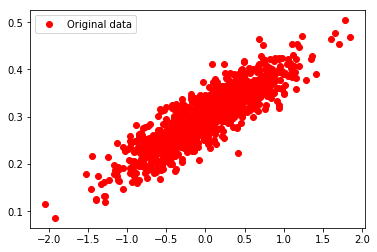

In [2]:
# 아래 코드를 실행해 주세요 
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1= np.random.normal(0.0, 0.55)
    y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

xs = np.asarray([v[0] for v in vectors_set])
ys = np.asarray([v[1] for v in vectors_set])

plt.plot(xs, ys, 'ro', label='Original data')
plt.legend()
plt.show()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요

In [0]:
tf.reset_default_graph()

# Data를 받아오는 placeholder

x = tf.placeholder(tf.float32, shape=(None,), name='x')
y = tf.placeholder(tf.float32, shape=(None,), name="y_true")
learning_rate = tf.placeholder(tf.float32, name="learning_rate")
# y_res = tf.reshape(y, shape=[-1,1])

In [4]:
# 여기에 코드를 작성해주세요.
# Tensorboard

log_dir = './log'
tbc = tensorboardcolab.TensorBoardColab(graph_path=log_dir)

w0 = tf.Variable(tf.random_normal([]))
w1 = tf.Variable(tf.random_normal([]))

y_hat = w0*x+w1

error = y_hat-y
loss = tf.reduce_mean(error**2)

dw0 = tf.reduce_mean(error*x)
dw1 = tf.reduce_mean(error)

assign_w0 = tf.assign(w0, w0 - learning_rate * dw0)
assign_w1 = tf.assign(w1, w1 - learning_rate * dw1)

step = tf.group(assign_w0, assign_w1)

tf.summary.scalar('loss', loss)
tf.summary.scalar('w0', w0)
tf.summary.scalar('w1', w1)
merge_all = tf.summary.merge_all()

writer = tf.summary.FileWriter(logdir=log_dir)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(10000):
  _, loss_, merge_all_ = sess.run([step, loss, merge_all], {x: xs, y: ys, learning_rate: 0.01 })
  writer.add_summary(merge_all_, i)

Wait for 8 seconds...
TensorBoard link:
https://b39cadbb.ngrok.io
